<a href="https://colab.research.google.com/github/lawrenceN/git-for-science/blob/master/Monitoring_and_Reporting_Changes_in_Surface_Water_Using_Satellite_Image_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

According to the UNESCO, **'Freshwater is the most important resource for human kind living'**. Fresh water is an enabling or a source of conflict for any technological, social, cooperation or conflict in the world. Comparing past water resources with those of the present can help us understand how past sociental and economic decisions can contribute to more informed management decision in the future. We have publicly available dataset from orgnizations like NASA and European Space Agency - Sentinel 2 . You have been hired by the UNESCO, to use satellite imagery and deep learning image segmentation algorithms to assess the changes to freshwater resources over time. 

# Getting Started

We demonstrate how to load images. We will start by using one image from the inbuilt CIFAR10 dataset. We take the first iamge and delete the rest.

In [ ]:
import tensorflow as tf

In [ ]:
(x_train,_),(_,_)=tf.keras.datasets.cifar10.load_data()

In [ ]:
img=x_train[2]

In [ ]:
del x_train

In [ ]:
#We need to check the nature of the selected image. 

img.shape

(32, 32, 3)

In [ ]:
img_array=tf.image.resize(img,(64,64),preserve_aspect_ratio=True,antialias=False,name=None)

In [ ]:
#We then rotate the image 90 degrees.

img_r=tf.image.rot90(img_array)

In [ ]:
#We then plot the image.
import matplotlib.pyplot as plt
%matplotlib inline



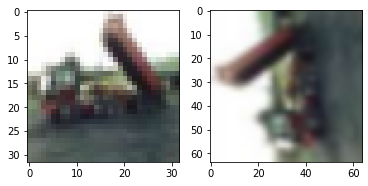

In [ ]:
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(img_r.numpy().astype('uint8'), cmap='gray')

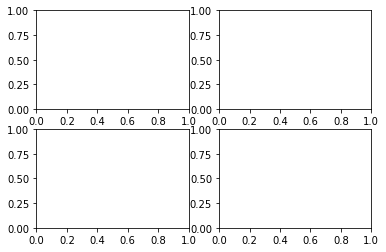

In [ ]:
#Question One on the workbook///
fig, ax1=plt.subplots(2,2)



### Mounting Data from Google Drive

Sometimes you have dataset that is in the drive. When working with colab, it is possible to mount data from Google Drive. 

In [ ]:
pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!ls './drive/My Drive/data'

cars


# Data Acquisition and Pre-Processing

The main objectives of this section:


*   Introduce the tools required to access and format large datasets programmatically (i.e with code) and those specific to analyzing satellite or other geospatial imagery.

*   Introduction to geospatial imagery formats and concepts (imagery in a particular coordinate system) 

*  Introduction to image labeling workflows.



This is the most difficult part of our project (Since it will introduce domain specific concepts). Specifically the domain is **geospatial analysis**, but also cartography, geodesy, and satellite remote sensing. A few terms:


*   Remote Sensing- the fancy term for satellite images
*   Orthorectification - Process of lining up images to a base map (the "rectification" part, and correcting distortion associated with varying elevation -- height - this is the ortho part)

*   UTM - Universal Transverse Mercator - Coordinate system like latitude/longitude. Requires a "zone", that differs where you are in longitude (the UTM number) and whether or not you are in the northern or southern hemispher.
* Raster/Vector - Raster - pixel images, Vector - series of points.
DEM - Digital Evevation Map -- the height of any place on Earth.



All of the images we will work with are of lakes somewhere on Earth. Some of the imagery we will be working with an explicity reference the location of the image on the Earth (the coordinates). The coordinate system whose locations refer to (called a coordinate reference system, or CRS). Such information is called metadata and is stored in the image headers. This milestone will explore various image formats (most common), namely geo TIFF (.tif or tiff) file extensions and also JPEG- 2000 (.jp2 extension)
Rasters or "gridded data" are stored as a grid of values which are rendered on a map as pixels. E.g. Google Earth Imagery.  Can be 2D when they depict only one band of intensities. The 2D images horizontal (in both directions).  Can also be 3D if you have a stack 3 2D rasters on top of one another.  For example every color photograph you have seen is a 3D raster, composed of 3 2D rasters: The first is the intensity in the red(R) channel, the 2nd is Green, and the third is Blue.  - RGB- 3D rasters = multispectral. spectral is because of EM spectrum representation of the R, G and B. Note: satellites also colllect data in portions that we cannot see (infra-red and ulta-violet portions). Depending on the number of bands, such data is called either multispectral or hyperspectral. If you stack more than 3 bands in raster then it is called a hyperspectral imagery. and not 4D or 5D. Such images may have up to hundreds of individual bands or sensitivities to different portions of the EMS. Each pixel value of the raster represents an area on the Earth's surface and is therefore, sensitive to the groud moisture and temperature as well as weather and other atmospheric variations. It is difficult to use satellite imagery only and this is why we need  Deep learning  for this kind of problem. A raster file is composed of regular grid of cells, all of which are the same size. However the raster we are going to work with are different from the photographs because they are spatially referenced. I you pick a piexel it represents an area of land on the ground. And the area of a pixel on the groud is defined by spatial resolution of the raster.  We are working with Sentinel 2 with 10-m spatial resolution (10m*10m ) area on the groud. 







1. Dataset 1: A time series of the cloudless sentinel 2 imagery. 



*   Use it to know sentinel 2 satellite imagery and illustrate how Earths lakes are changing 
*   Develop "test" dataset required to evaluate the models. Using python and Sentinel 2 cloudless API  and working with raster imagery.

* View imagery == (optional) - QGIS 


2.   Dataset 2: NWPU- RESISC45 dataset of land covers and uses


*   Write a python program to download, unzip  and split and prepare the data
*   Load and display an example image and label in the Jypter notebook.


3. Creating our own label data. 


*   Creating label with the makesense site
*   The VGG JSON formt for polygon annotations
4. Convert the VGG JSON label format into a label image using Python.
5. Develop own dataset using the Sentinelsat package


*   Sentinel API-- Introduction to GeoJSON and API query using GeoJSON. Filtering imagery by mission orbit, date, type, cloud cover etc. 
*   Unzipping compressed files
* Merge Imagery with Rasterio.











In [ ]:
# Load the necessary libraries

In [ ]:
pip install rasterio

     |████████████████████████████████| 18.2MB 1.3MB/s 


In [ ]:
from PIL import Image, ImageDraw
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json, os, glob
import rasterio

# Enhancing and Segmenting Images

# Model Training and Evaluation

# Model Optimization

# Reporting to UNESCO